# Initial Inspection

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gdf = gpd.read_file("../data/Canada/Canadian_landslide_database_January2025_version10.csv")

In [ ]:
gdf.head()

,LS_ID,Name,Longitude,Latitude,Type,Material,Size_class,Timing,Trigger,Contributo,...,Study_area,Watercours,Event_verification,Volume_estimate_method,Discharge estimate (m3/s),Deposit_Arrea_m2,Bedrock_type,Point_location,Location_confidence,Comment
0,LS00001,Clinton Creek Mine,-140.7341,64.446393000000000,Debris avalanche,Anthropogenic,,1974,,,...,,,,,0,0,,Headscarp,High,Landslide dammed lake
1,LS00002,Old alignment failure,-140.1726,64.224711769999999,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
2,LS00003,Horseshoe Bay debris avalanche,-138.5108,61.040703000000001,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
3,LS00004,Small debris avalanche,-138.0579,61.448892479999998,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
4,LS00005,Volcano Mountain,-137.3798,62.921592720000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,Moderate,


In [4]:
len(gdf)

10704

In [5]:
# Filter for British Columbia based on longitude and latitude
# -130, 52 and -116, 52
bc_gdf = gdf[(gdf['Longitude'].astype(float) >= -130) & 
             (gdf['Longitude'].astype(float) <= -116) & 
             (gdf['Latitude'].astype(float) <= 52) ]

# Display information about the filtered dataframe
print(f"Number of records in BC: {len(bc_gdf)}")
bc_gdf.head()

Number of records in BC: 4240


,LS_ID,Name,Longitude,Latitude,Type,Material,Size_class,Timing,Trigger,Contributo,...,Study_area,Watercours,Event_verification,Volume_estimate_method,Discharge estimate (m3/s),Deposit_Arrea_m2,Bedrock_type,Point_location,Location_confidence,Comment
86,LS00087,Debris avalanche,-128.1971,50.533960000000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
87,LS00088,Debris avalanche,-128.187,50.535750000000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
88,LS00089,Debris avalanche,-128.1838,50.530299999999997,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
89,LS00090,Debris avalanche,-128.1819,50.531920000000000,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,
90,LS00091,Debris avalanche,-128.1769,50.540880000000001,Debris avalanche,Surficial,,,,,...,,,,,0,0,,Headscarp,High,


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_83869/2027393985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_gdf['Longitude'] = pd.to_numeric(bc_gdf['Longitude'], errors='coerce')
/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_83869/2027393985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_gdf['Latitude'] = pd.to_numeric(bc_gdf['Latitude'], errors='coerce')
/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_83869/2027393985.py:6: SettingWithCopyWarning: 
A v

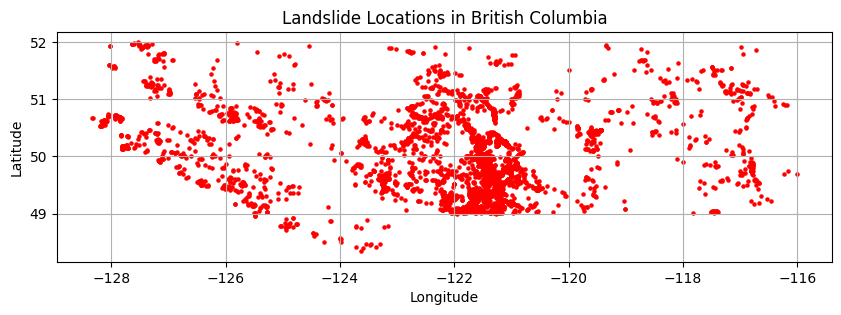

In [7]:
# Convert Longitude and Latitude to numeric types, coercing errors to NaN
bc_gdf['Longitude'] = pd.to_numeric(bc_gdf['Longitude'], errors='coerce')
bc_gdf['Latitude'] = pd.to_numeric(bc_gdf['Latitude'], errors='coerce')

# Drop rows with invalid coordinate values
bc_gdf.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Create a GeoDataFrame with point geometries
bc_gdf = gpd.GeoDataFrame(
    bc_gdf, geometry=gpd.points_from_xy(bc_gdf.Longitude, bc_gdf.Latitude))

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Landslide Locations in British Columbia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

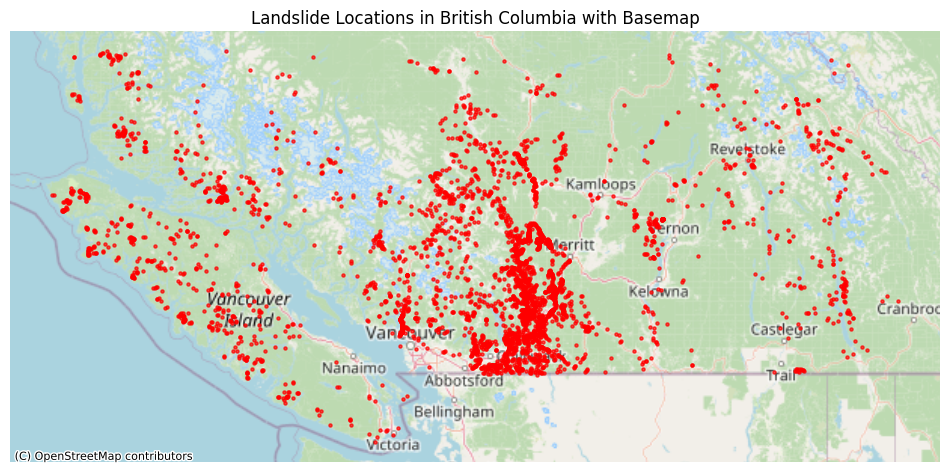

In [ ]:
import contextily as ctx

if bc_gdf.crs is None:
    bc_gdf.set_crs(epsg=4326, inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the landslide data
bc_gdf.to_crs(epsg=3857).plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='Landslides')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the plot
ax.set_title("Landslide Locations in British Columbia with Basemap")
ax.set_axis_off() # The basemap provides the geographic context
plt.show()

# Analysis

In [11]:
# Seperating deposits by column types
numerical_cols = gdf.select_dtypes(include=['number']).columns.tolist()

non_numerical_cols = gdf.select_dtypes(exclude=['number']).columns.tolist()

In [12]:
print("Numerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:

Non-Numerical Columns:
  - LS_ID
  - Name
  - Longitude
  - Latitude
  - Type
  - Material
  - Size_class
  - Timing
  - Trigger
  - Contributo
  - Reference
  - Type_details
  - Cont_details
  - Resource_road_activity
  - Resource_road_type
  - Study_area
  - Watercours
  - Event_verification
  - Volume_estimate_method
  - Discharge estimate (m3/s)
  - Deposit_Arrea_m2
  - Bedrock_type
  - Point_location
  - Location_confidence
  - Comment


In [33]:
import pandas as pd

def completeness(df: pd.DataFrame):
    total = len(df)
    comp = df.count()               # non-null counts per column
    pct = (comp / total * 100).round(1)
    return pd.DataFrame({"non_null": comp, "% filled": pct})

df_completeness = completeness(bc_gdf)
print(df_completeness)
# print(completeness(deposits))


                           non_null  % filled
LS_ID                          4240     100.0
Name                           4240     100.0
Longitude                      4240     100.0
Latitude                       4240     100.0
Type                           4240     100.0
Material                       4240     100.0
Size_class                     4240     100.0
Timing                         4240     100.0
Trigger                        4240     100.0
Contributo                     4240     100.0
Reference                      4240     100.0
Type_details                   4240     100.0
Cont_details                   4240     100.0
Resource_road_activity         4240     100.0
Resource_road_type             4240     100.0
Study_area                     4240     100.0
Watercours                     4240     100.0
Event_verification             4240     100.0
Volume_estimate_method         4240     100.0
Discharge estimate (m3/s)      4240     100.0
Deposit_Arrea_m2               424

## Confidence

In [13]:
print("Value Counts for Location Confidence:")
print(bc_gdf['Location_confidence'].value_counts())

Value Counts for Location Confidence:
Location_confidence
High        3105
             947
Moderate     171
Low           17
Name: count, dtype: int64


## Material

In [14]:
print("Value Counts for Material:")
print(bc_gdf['Material'].value_counts())

Value Counts for Material:
Material
Surficial        3033
Rock             1192
Anthropogenic       9
Surficial           4
 Surficial          2
Name: count, dtype: int64


## Name

In [15]:
print("Value Counts for Name:")
print(bc_gdf['Name'].value_counts())

Value Counts for Name:
Name
Debris flow                       439
Lytton Creek Fire                 363
Debris avalanche                  313
Earth slide                       312
Rock slide                        213
                                 ... 
Chehalis Lake Landslide             1
Liumchen Creek                      1
Fountain Indian Reserve             1
Nahatlatch River landslide dam      1
Gaspar Creek landslide              1
Name: count, Length: 972, dtype: int64


In [16]:
value_counts = bc_gdf['Name'].value_counts()
print(f"{'Landslide Name':<40} {'Occurrences':<10}")
print()
for name, count in value_counts.items():
    print(f"{name:<40} {count:<10}")

Landslide Name                           Occurrences

Debris flow                              439       
Lytton Creek Fire                        363       
Debris avalanche                         313       
Earth slide                              312       
Rock slide                               213       
DSGSD                                    160       
Rock fall                                129       
Debris flood                             91        
Elephant Hill Fire                       82        
Debris slide                             82        
July Mountain Fire                       62        
Earth flow                               55        
Rock slump                               51        
Scuzzy Creek                             48        
Coquihalla River                         45        
Harrison Lake                            43        
Slump                                    42        
Nahalatch River                          33        
Chilliwack

## Type

In [17]:
type_counts = bc_gdf['Type'].value_counts()
print("\nValue Counts for Type:")
print(type_counts)


Value Counts for Type:
Type
Debris flow                   1494
Rock slide                     552
Debris avalanche               487
Earth slide                    460
Debris flood                   328
Rock fall                      305
Mountain slope deformation     211
Debris slide                   107
Rock avalanche                  88
Earth flow                      75
Flood                           59
Rock complex                    27
Mud flow                        10
Earth fall                      10
Flowslide                        7
Rock spread                      6
GLOF                             4
Rock topple                      4
Submarine landslide              3
Debris fall                      2
Debris flow                      1
Name: count, dtype: int64


## Size Class

In [8]:
size_counts = bc_gdf['Size_class'].value_counts(dropna=False)
print("\nValue counts for 'Size_class':")
print(size_counts)


Value counts for 'Size_class':
Size_class
               3989
Large            33
Small            18
20                9
25                7
               ... 
400               1
2000              1
1850              1
380               1
10000-30000       1
Name: count, Length: 134, dtype: int64


## Timing

In [9]:
timing_counts = bc_gdf['Timing'].value_counts(dropna=False)
print("\nValue counts for 'Timing':")
print(timing_counts)


Value counts for 'Timing':
Timing
                  2002
15-Nov-21         1351
2022-Aug-10        177
July 17; 2022       64
2018                59
                  ... 
27-06-1957           1
6/10/1957            1
29-10-1957           1
23-01-1958           1
16-Sep-24            1
Name: count, Length: 325, dtype: int64


## Trigger

In [10]:
trigger_counts = bc_gdf['Trigger'].value_counts(dropna=False)
print("\nValue counts for 'Trigger':")
print(trigger_counts)


Value counts for 'Trigger':
Trigger
                       2384
Precipitation          1672
Rainfall                150
Anthropogenic             7
Snowmelt                  6
Resource Road             5
Snowmelt & Rainfall       4
Dam failure               3
Earthquake                2
Moraine dammed lake       1
Rain on snow              1
Deglaciation              1
Heat wave                 1
Bank erosion              1
Freeze-thaw               1
Earthquake?               1
Name: count, dtype: int64


## Contributo

In [11]:
contributor_counts = bc_gdf['Contributo'].value_counts(dropna=False)
print("\nValue counts for 'Contributor':")
print(contributor_counts)


Value counts for 'Contributor':
Contributo
                                 2783
Post-Wildfire                     384
Post-wildfire                     366
Resource Road                     265
Logging                           201
Lateral Instability               186
Resource road                      34
Urbanization                       10
Large Landslide                     6
River erosion                       3
 Post-Wildfire                      1
Post-wildfire & Resource Road       1
Name: count, dtype: int64


## Reference

In [12]:
reference_counts = bc_gdf['Reference'].value_counts(dropna=False)   
print("\nValue counts for 'Reference':")
print(reference_counts)


Value counts for 'Reference':
Reference
                                                       2379
Hancock and Wlodarczyk (2025)                          1327
Blais-Stevens and Septer; 2008                          149
BGC; 2023                                               108
Blais-Stevens; 2020                                      75
Westrek; 2017                                            28
VanDine and Evans 1992                                   22
HazMapper (2023)                                         22
Jordan and Covert (2009)                                 21
Geertsema et al. 2025                                    11
Tannant and Skermer; 2013                                10
Jordan; 2001                                              9
Kirschbaum et al. 2015; NASA GLC                          9
Fulton; 1974                                              6
BGC                                                       6
BC Flood Debris Dashboard                                 5

## Type_details

In [16]:
type_details_counts = bc_gdf['Type_details'].value_counts()
print("\nValue counts for 'Type_details':")
print(type_details_counts)


Value counts for 'Type_details':
Type_details
                                                3819
13. SOIL slide (gravel/sand/debris)              250
Type IV - mostly prone to Debris flows            80
Type III - mix Debris flood and Debris flows      25
Debris flow/Debris flood                          24
Type 1                                             7
25. SOIL debris avalanche                          5
20. SOIL flowslide (sand/silt/debris)              5
Debris flood/flood                                 4
12. SOIL planar slide (clay/silt)                  4
11. SOIL rotational slide (clay/silt)              4
Earth Slump                                        3
Type II - mix floods and Debris flood              3
Debris slide (translational)                       2
9. ROCK compound slide                             2
7. ROCK planar slide                               1
1. ROCK fall (rock/ice)                            1
Drainage diversion                                 1

## Cont_details

In [17]:
cont_details_counts = bc_gdf['Cont_details'].value_counts()
print("\nValue counts for 'Cont_details':")
print(cont_details_counts)


Value counts for 'Cont_details':
Cont_details
                        3420
2021                     386
2017                      90
Mixed cut block ages      77
2018                      47
2003                      29
2004                      18
2009                      16
1998                      15
2015                      12
1980                       7
Unmapped                   7
1983                       7
ROW                        6
1987                       6
1990                       5
1985                       5
2000                       4
1963                       4
2016                       4
2024                       4
1993                       4
1989                       4
1984                       3
1962                       3
1999                       3
2023                       3
1979                       3
1973                       3
1960                       3
1964                       3
1968                       3
1978                     

## Resource_road_activity

In [18]:
resource_road_activity_counts = bc_gdf['Resource_road_activity'].value_counts()
print("\nValue counts for 'Resource_road_activity':")
print(resource_road_activity_counts)


Value counts for 'Resource_road_activity':
Resource_road_activity
           4041
Active       90
Unknown      86
Retired      23
Name: count, dtype: int64


## Resource_road_type

In [19]:
resource_road_type_counts = bc_gdf['Resource_road_type'].value_counts()     
print("\nValue counts for 'Resource_road_type':")
print(resource_road_type_counts)


Value counts for 'Resource_road_type':
Resource_road_type
                       4041
Unknown                  86
Road permit              67
Forest Service Road      24
Road Permit              19
Forest service road       3
Name: count, dtype: int64


## Study_area

In [20]:
study_area_counts = bc_gdf['Study_area'].value_counts(dropna=False)
print("\nValue counts for 'Study_area':")
print(study_area_counts)


Value counts for 'Study_area':
Study_area
                                       3365
Fraser Valley Regional District         581
Thompson-Nicola Regional District       253
Metro Vancouver Regional District         9
Squamish Lillooet Regional District       8
K60639                                    8
K62088                                    5
Capital Regional District                 4
Cowichan Valley Regional District         3
K62317                                    3
Sunshine Coast Regional District          1
Name: count, dtype: int64


## Watercours

In [22]:
watercourse_counts = bc_gdf['Watercours'].value_counts(dropna=False)
print("\nValue counts for 'Watercourse':")      
print(watercourse_counts)


Value counts for 'Watercourse':
Watercours
                     3275
Unnamed Creek         756
Unnamed landslide      26
Unnamed Road           21
Sumas Mountain         19
                     ... 
Camilos Creek           1
Gillis Creek            1
Brook Creek             1
Shouz Creek             1
Nahatlatch Creek        1
Name: count, Length: 114, dtype: int64


## Event_verification

In [23]:
event_verification_counts = bc_gdf['Event_verification'].value_counts(dropna=False)
print("\nValue counts for 'Event_verification':")
print(event_verification_counts)


Value counts for 'Event_verification':
Event_verification
                 2727
Satellite         773
Event             337
Lidar             265
Field             125
Record/Report      10
 Satellite          1
Report              1
Event & Field       1
Name: count, dtype: int64


## Volume_estimate_method

In [24]:
volume_estimate_method_counts = bc_gdf['Volume_estimate_method'].value_counts(dropna=False)
print("\nValue counts for 'Volume_estimate_method':")
print(volume_estimate_method_counts)


Value counts for 'Volume_estimate_method':
Volume_estimate_method
                                4150
Lidar Change Detection (LCD)      70
Estimated                          9
Field Measurement                  6
Field measurement                  2
rr                                 1
450                                1
7000                               1
Name: count, dtype: int64


## Discharge estimate (m3/s)

In [26]:
discharge_estimate_counts = bc_gdf['Discharge estimate (m3/s)'].value_counts(dropna=False)
print("\nValue counts for 'Discharge_estimate (m3/s)':")
print(discharge_estimate_counts)


Value counts for 'Discharge_estimate (m3/s)':
Discharge estimate (m3/s)
0      4124
         88
2         4
3         2
111       1
4         1
43        1
-1        1
20        1
125       1
35        1
36        1
14        1
12        1
207       1
16        1
90        1
58        1
1         1
7         1
67        1
41        1
61        1
199       1
800       1
115       1
Name: count, dtype: int64


## Deposit_Arrea_m2

In [27]:
deposit_area_counts = bc_gdf['Deposit_Arrea_m2'].value_counts(dropna=False)
print("\nValue counts for 'Deposit_Arrea_m2':")
print(deposit_area_counts)


Value counts for 'Deposit_Arrea_m2':
Deposit_Arrea_m2
0       4037
          88
6500       4
4500       4
7500       4
        ... 
660        1
70         1
475        1
1580       1
970        1
Name: count, Length: 83, dtype: int64


## Bedrock_type

In [28]:
bedrock_type_counts = bc_gdf['Bedrock_type'].value_counts(dropna=False)
print("\nValue counts for 'Bedrock_type':")
print(bedrock_type_counts)


Value counts for 'Bedrock_type':
Bedrock_type
                       4135
Granitic                 37
Mixed                    22
Sedimentary              17
Volcanic                 12
Metamorphic               6
Quaternary Sediment       2
>2,000                    1
500                       1
20                        1
5                         1
100                       1
700                       1
10                        1
1,000                     1
30                        1
Name: count, dtype: int64


## Point_location

In [29]:
point_location_counts = bc_gdf['Point_location'].value_counts(dropna=False)
print("\nValue counts for 'Point_location':")
print(point_location_counts)


Value counts for 'Point_location':
Point_location
                   1243
Headscarp          1156
Deposit            1003
Source              630
Infrastructure      206
 Infrastructure       2
Name: count, dtype: int64


## Location_confidence

In [30]:
location_confidence_counts = bc_gdf['Location_confidence'].value_counts(dropna=False)
print("\nValue counts for 'Location_confidence':")
print(location_confidence_counts)   


Value counts for 'Location_confidence':
Location_confidence
High        3105
             947
Moderate     171
Low           17
Name: count, dtype: int64


## Comment

In [31]:
comment_counts = bc_gdf['Comment'].value_counts(dropna=False)
print("\nValue counts for 'Comment':")
print(comment_counts)


Value counts for 'Comment':
Comment
                                                                                                                  4141
Landslide dammed lake                                                                                               40
Location based on 2004 Google Earth imagery                                                                         21
Imagery                                                                                                             12
Satellite                                                                                                            7
Replaces duplicate in version 8                                                                                      6
Removed from 2021 inventory                                                                                          3
Debris floods and flash flooding posed risk to infrastructure; 50 homes; and 150 people                              2
Landslide  